# Implementación de Modelo Linear para Clasificación

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import random

In [193]:
os.chdir('C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos')

In [194]:
sns.set()
%matplotlib inline

In [195]:
c_map = {0: 'deeppink', 1: 'teal', 2: 'violet'}

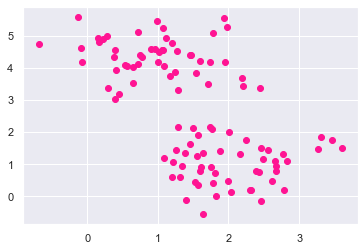

In [196]:
#Generacion de datos en 2D
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=100, centers=2, n_features=2,
                       cluster_std=0.65, random_state=0)
plt.scatter(X[:, 0],X[:, 1],c=c_map[0])

In [197]:
X_train=X[0:89,:]
X_test=X[90:99,:]
y_train=y_true[0:89]
y_test=y_true[90:99]

In [198]:
X_train.shape

(89, 2)

In [199]:
#Funcion para generar el vector Beta y el valor de Beta0
def betas_lm(X,y):
    n0=0
    n1=0
    
    for a in range(X.shape[0]):
        if (y[a]==0):
            n0=n0+1
        else:
            n1=n1+1
            
    nn=X.shape[0]
    X0=np.zeros((n0,X.shape[1]))
    X1=np.zeros((n1,X.shape[1]))
    SW=np.zeros((X.shape[1],X.shape[1]))
    
    j=0
    k=0
    
    for i in range(nn):
        if (y[i]==0):
            X0[j,]=X[i,]
            j=j+1
            sw1=np.array([[X[i,0]],[X[i,1]]])
            SW=SW+np.dot(sw1,np.transpose(sw1))
        else:
            X1[k,]=X[i,]
            k=k+1
            sw2=np.array([[X[i,0]],[X[i,1]]])
            SW=SW+np.dot(sw2,np.transpose(sw2))
    
    c=np.average(X,axis=0)
    c0=np.average(X0,axis=0)
    c1=np.average(X1,axis=0)
    
    C=np.array([[c[0]],[c[1]]])
    C0=np.array([[c0[0]],[c0[1]]])
    C1=np.array([[c1[0]],[c1[1]]])
    
    SB=np.dot((C0-C1),np.transpose((C0-C1)))
    SW=SW-n0*(np.dot(C0,np.transpose(C0)))-n1*(np.dot(C1,np.transpose(C1)))
    
    M=SW+((n0*n1)/nn)*SB
    Beta=np.dot(np.linalg.inv(M), nn*(C0-C1))
    Beta0=-np.dot(np.transpose(Beta),C)
    
    return Beta,Beta0,n0,n1

In [200]:
beta,beta0,n0,n1=betas_lm(X_train,y_train)

<function matplotlib.pyplot.show(*args, **kw)>

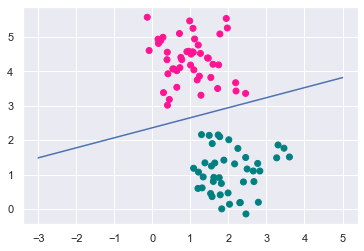

In [201]:
x = np.linspace(-3, 5, 100)
y= (-1/beta[1])*(beta[0]*x + beta0)
y=np.transpose(y)

#Grafica del modelo lineal obtenido
plt.scatter(X_train[:, 0],X_train[:, 1],c=[c_map[i] for i in y_train])
plt.plot(x,y)
plt.show

In [202]:
#Funcion que nos determina la clasificacion del nuevo conjunto de datos
#De acuerdo con los parametros del modelo lineal y la funcion de costo
def clasi_lm(X,n0,n1,B,B0):
    y_new=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        t2=np.dot(np.transpose(B),X[i,:])
        costo0=(((n0+n1)/n0)-t2[0]-B0[0])
        costo0=costo0[0]*costo0[0]
        costo1=((-(n0+n1)/n1)-t2[0]-B0[0])
        costo1=costo1[0]*costo1[0]
        if costo0<=costo1:
            y_new[i]=0
        else:
            y_new[i]=1
    return y_new

In [203]:
#Probamos con el conjunto de prueba y los parametros obtenidos previamente
y_new=clasi_lm(X_test,n0,n1,beta,beta0)
y_new

array([1., 1., 1., 1., 0., 0., 1., 1., 0.])

In [204]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 0])

<function matplotlib.pyplot.show(*args, **kw)>

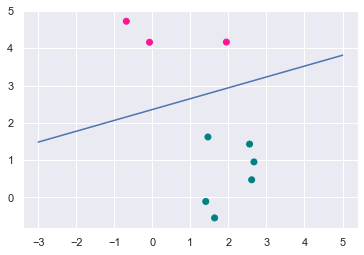

In [205]:
#Graficamos el conjunto de prueba con el color correspondiente 
#a la clasificacion obtenida de acuerdo al minimo de funcion de costo
#Ademas de la linea del modelo lineal obtenido previamente
plt.scatter(X_test[:, 0],X_test[:, 1],c=[c_map[i] for i in y_new])
plt.plot(x,y)
plt.show

# Implementacion con Pesos

In [226]:
def pesos(X,y):
    n0=0
    n1=0
    
    for a in range(X.shape[0]):
        if (y[a]==0):
            n0=n0+1
        else:
            n1=n1+1
            
    nn=X.shape[0]
    X0=np.zeros((n0,X.shape[1]))
    X1=np.zeros((n1,X.shape[1]))
    SW=np.zeros((X.shape[1],X.shape[1]))
    SW1=np.zeros((X.shape[1],X.shape[1]))
    SW2=np.zeros((X.shape[1],X.shape[1]))
    
    j=0
    k=0
    
    for i in range(nn):
        if (y[i]==0):
            X0[j,]=X[i,]
            j=j+1
            sw1=np.array([[X[i,0]],[X[i,1]]])
            SW=SW+np.dot(sw1,np.transpose(sw1))
            SW1=SW1+np.dot(sw1,np.transpose(sw1))
        else:
            X1[k,]=X[i,]
            k=k+1
            sw2=np.array([[X[i,0]],[X[i,1]]])
            SW=SW+np.dot(sw2,np.transpose(sw2))
            SW2=SW2+np.dot(sw2,np.transpose(sw2))
    
    c=np.average(X,axis=0)
    c0=np.average(X0,axis=0)
    c1=np.average(X1,axis=0)
    
    C=np.array([[c[0]],[c[1]]])
    C0=np.array([[c0[0]],[c0[1]]])
    C1=np.array([[c1[0]],[c1[1]]])
    
    SB=np.dot((C0-C1),np.transpose((C0-C1)))
    SW=SW-n0*(np.dot(C0,np.transpose(C0)))-n1*(np.dot(C1,np.transpose(C1)))
    
    M=SW+((n0*n1)/nn)*SB
    Beta=np.dot(np.linalg.inv(M), nn*(C0-C1))
    Beta0=-np.dot(np.transpose(Beta),C)
    w0=np.linalg.det(SW1)/(np.linalg.det(SW1)+np.linalg.det(SW2))
    w1=np.linalg.det(SW2)/(np.linalg.det(SW1)+np.linalg.det(SW2))
    
    return w0,w1

In [227]:
wi=pesos(X_train,y_train)

In [228]:
def clasi_lmw(X,n0,n1,B,B0,wi):
    y_new=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        t2=np.dot(np.transpose(B),X[i,:])
        costo0=wi[0]*(((n0+n1)/n0)-t2[0]-B0[0])
        costo0=costo0[0]*costo0[0]
        costo1=wi[0]*((-(n0+n1)/n1)-t2[0]-B0[0])
        costo1=costo1[0]*costo1[0]
        if costo0<=costo1:
            y_new[i]=0
        else:
            y_new[i]=1
    return y_new

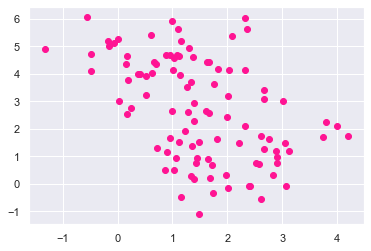

In [245]:
X2, y_true2 = make_blobs(n_samples=100, centers=2, n_features=2,
                       cluster_std=0.9, random_state=0)
plt.scatter(X2[:, 0],X2[:, 1],c=c_map[0])

In [251]:
X2_train=X2[0:89,:]
X2_test=X2[90:99,:]
y2_train=y_true2[0:89]
y2_test=y_true2[90:99]

In [252]:
beta2,beta02,n02,n12=betas_lm(X2_train,y2_train)
y2_new=clasi_lmw(X2_test,n02,n12,beta2,beta02,wi)
y2_new

array([1., 1., 1., 1., 0., 0., 1., 1., 0.])

<function matplotlib.pyplot.show(*args, **kw)>

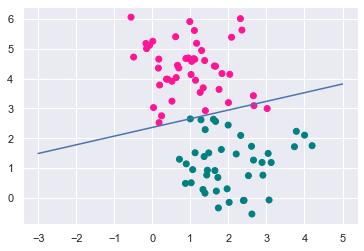

In [255]:
#Grafica del modelo lineal obtenido
plt.scatter(X2_train[:, 0],X2_train[:, 1],c=[c_map[i] for i in y2_train])
plt.plot(x,y)
plt.show

In [253]:
y2_test

array([1, 1, 1, 1, 0, 0, 1, 1, 0])

<function matplotlib.pyplot.show(*args, **kw)>

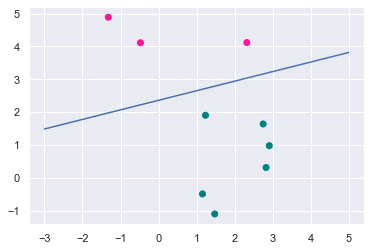

In [254]:
plt.scatter(X2_test[:, 0],X2_test[:, 1],c=[c_map[i] for i in y2_new])
plt.plot(x,y)
plt.show